In [20]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# --- MEMUAT DATA IRIS ---
# Memuat dataset dari scikit-learn
iris_bunch = load_iris()

# Membuat DataFrame pandas untuk kemudahan analisis
# iris_bunch.data berisi 4 fitur pengukuran
# iris_bunch.feature_names berisi nama-nama kolom fitur
X = pd.DataFrame(iris_bunch.data, columns=iris_bunch.feature_names)

# iris_bunch.target berisi target dalam bentuk angka (0, 1, 2)
# iris_bunch.target_names berisi nama asli dari target (setosa, versicolor, virginica)
y = pd.Series(iris_bunch.target, name='species').map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Menggabungkan fitur (X) dan target (y) menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# Menampilkan 5 baris pertama dari data untuk melihat isinya
print("--- Tampilan Awal Data Iris ---")
print(df.head())
print("Jumlah data per spesies:")
print(df['species'].value_counts())

--- Tampilan Awal Data Iris ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Jumlah data per spesies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x_class = df.drop('species', axis=1)
y_class = df['species']

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.2, random_state=42, stratify=y_class)
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
model_kkn_scaled = KNeighborsClassifier(n_neighbors=3)
model_kkn_scaled.fit(x_train, y_train)
predictions_scaled = model_kkn_scaled.predict(x_test)
accuracy_scaled = accuracy_score(y_test, predictions_scaled)
print(f"akurasi model = {accuracy_scaled:.2f}")
print(f"Prediksi untuk data uji = {predictions_scaled[:5]}")
print(f"Data uji = {y_test.values[:5]}")



akurasi model = 0.93
Prediksi untuk data uji = ['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa']
Data uji = ['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa']


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x_cluster = df.drop('species', axis=1)

model_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
model_kmeans.fit(x_cluster)
   
df['cluster_id'] = model_kmeans.labels_

silhouette = silhouette_score(x_cluster, model_kmeans.labels_)
print("pengelompokan:")
print(df.head())
print(f"Silhouette Score: {silhouette:.2f}")
print("Perbandingan hasil cluster dengan spesies asli:")
print(pd.crosstab(df['species'], df['cluster_id']))


pengelompokan:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  cluster_id  
0  setosa           1  
1  setosa           1  
2  setosa           1  
3  setosa           1  
4  setosa           1  
Silhouette Score: 0.55
Perbandingan hasil cluster dengan spesies asli:
cluster_id   0   1   2
species               
setosa       0  50   0
versicolor   3   0  47
virginica   36   0  14


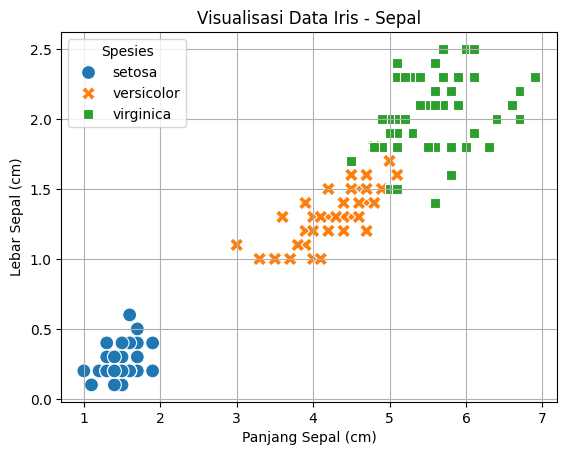

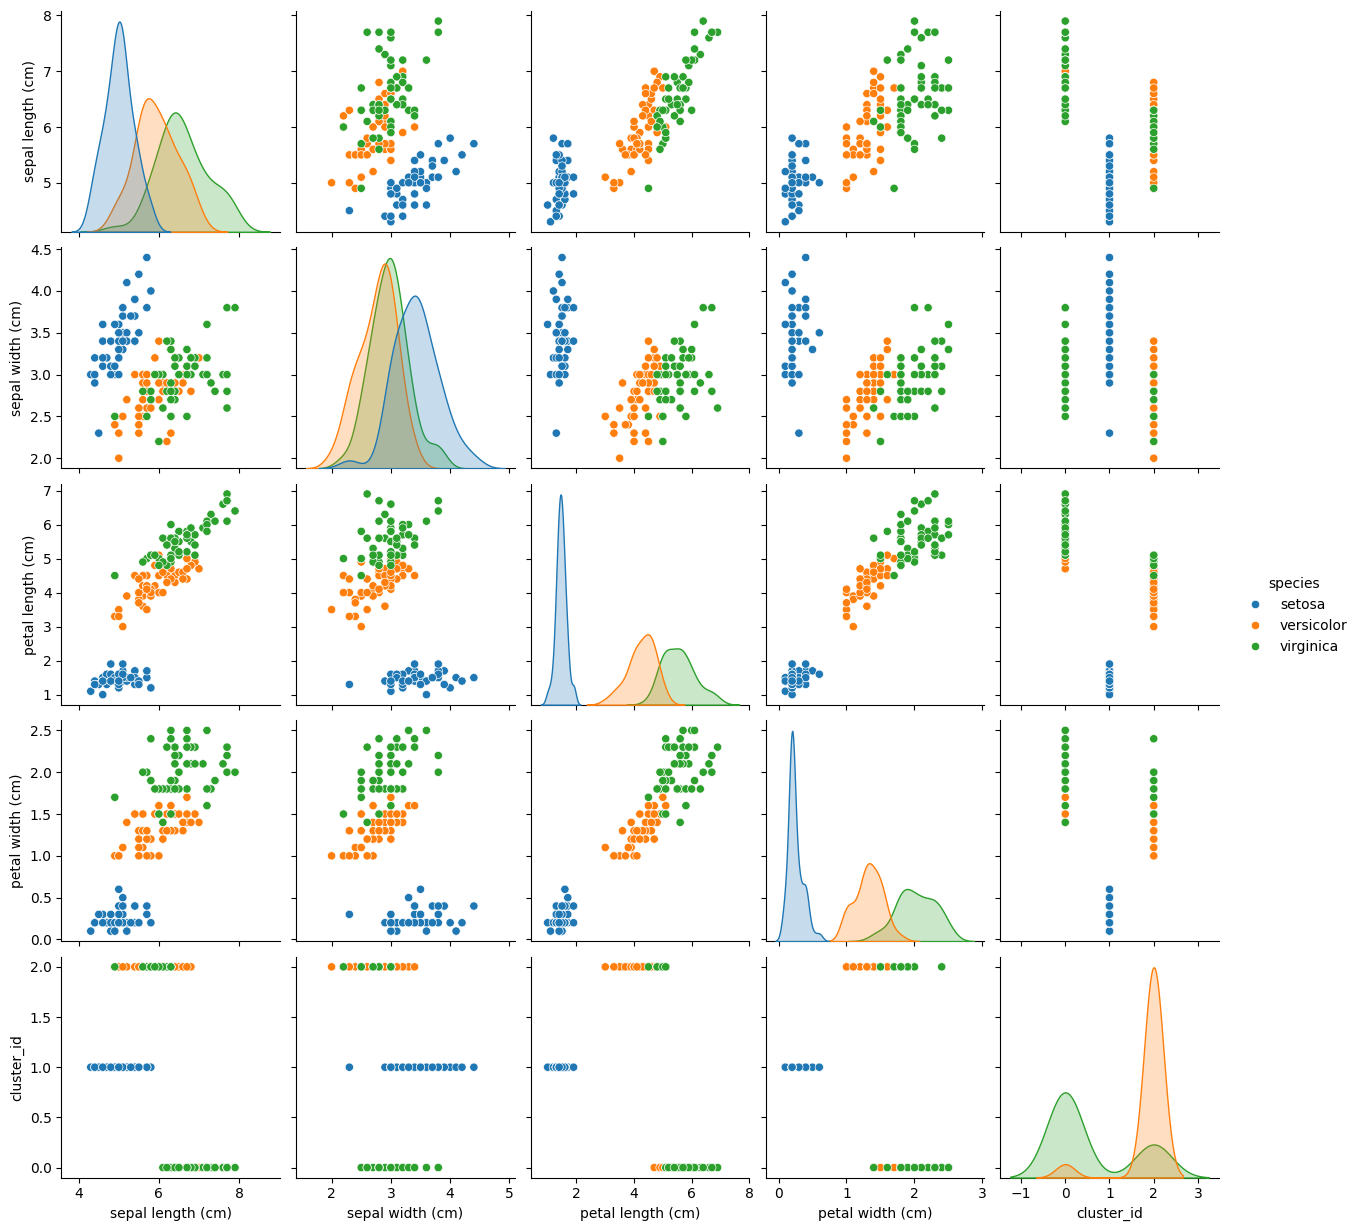

In [23]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', style='species', s=100)

plt.title('Visualisasi Data Iris - Sepal')
plt.xlabel('Panjang Sepal (cm)')
plt.ylabel('Lebar Sepal (cm)')
plt.grid(True)
plt.legend(title='Spesies')
plt.show()

sns.pairplot(df, hue='species')
plt.show()